check border of image

In [ ]:
import matplotlib.pyplot as plt
import cv2 


def rotate_image( img, angle = 3):
    # get cv2 image
    # this function get an image and angle then rotate image by this angle
    height, width = img.shape[:2]
    rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), angle, 1)

    if img.shape[2] == 4:
        borderValue = (255,255,255,0)
    else:
        borderValue = (255,255,255)

    rotated_image = cv2.warpAffine(img, rotation_matrix, (width, height) , borderValue = borderValue , flags=cv2.INTER_NEAREST)
    return rotated_image




im = cv2.imread("_______INS/206_lpr2/02.png" , cv2.IMREAD_UNCHANGED)
im = rotate_image( im, angle = 0)
cv2.imwrite("UUUUU1.png" , im)

In [ ]:
import matplotlib.pyplot as plt
import cv2 

im = cv2.imread("_______INS/206_lpr2/02.png" , cv2.IMREAD_UNCHANGED)
print(im.shape)
im3 = im[:,:,3]
plt.imshow(im3 , cmap="gray")

In [ ]:
import numpy as np
# Create the output directory if it doesn't exist

# Threshold the image for 255 value
_, im1 = cv2.threshold(im[:,:,2], 254.5, 255, cv2.THRESH_BINARY)

im1 = 255 - im1
# Continue with the existing code

# Initialize frame count

plt.imshow(np.abs(im3 - im1) , cmap="gray")
cv2.imwrite("UUUUU1.jpg" , np.abs(im3 - im1))

In [ ]:

import os
import cv2

def extract_frames(video_path, output_directory):
    # Open the video file
    video = cv2.VideoCapture(video_path)
    
    # Create the output directory if it doesn't exist
    os.makedirs(output_directory, exist_ok=True)
    
    # Initialize frame count
    frame_count = 0
    
    while True:
        # Read the next frame from the video
        ret, frame = video.read()
        
        # If the frame was not successfully read, then we have reached the end of the video
        if not ret:
            break
        
        # Save the frame as an image file
        output_path = os.path.join(output_directory, f"frame_{frame_count}.jpg")
        cv2.imwrite(output_path, frame)
        
        # Increment the frame count
        frame_count += 1
    
    # Release the video file
    video.release()

video_path = "runs/segment/predict/frames.avi"
output_directory = "_______INS/benz/frames"
extract_frames(video_path, output_directory)





In [ ]:
from ultralytics import YOLO


model_yolo =  YOLO("model/yolov8m-seg.pt")


results = model_yolo.predict("_______INS/benz/frames.mp4" , verbose=False  , conf=.8 , save=True)
# results = results[0].cpu().numpy().boxes.data

In [ ]:
tuple([3]*8)

In [ ]:
from torchvision import transforms
import onnxruntime
import numpy as np 
from PIL import Image

In [ ]:
sz = 420
model = onnxruntime.InferenceSession("model/angle_mobileNet_20.onnx")
transforms =  transforms.Compose([
        transforms.Resize((sz , sz)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
    ])

In [ ]:
img = Image.open("1.jpg").convert('RGB')
img = transforms(img)
img = np.array(img)

img = np.expand_dims(img, 0).astype(np.float32)
    
ort_outs = model.run(None, {"input":img})

ort_outs[0][0][0]

## test class

In [1]:
import json 



with open(f"_______INS/__MODE0/benz/358956718154_gyro.json") as f:
    data = json.load(f)


x_list = [v["x"] for k, v in data.items()]
len(x_list)

40

In [2]:
import glob
from natsort import natsorted
from deployment.Stabilizer import Stabilizer

folder = "benz"
stab = Stabilizer("model/rtdetr-l.pt" , "model/angle_mobileNet_20.onnx")
imgs = glob.glob(f"_______INS/__MODE0/{folder}/fsel/*")

c = 0
for im in natsorted(imgs):
    c+=1
    try:
        stab.run(im ,f"_______OUTS/disjoint_version/__MODE0/{folder}/1/"+str( c)+".json", x_list[c-1]  ,  height_fraction=0.57 , mode = 0)
    except Exception as e :
        print(">>>>> ",e)

    print(c)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40


In [1]:
import glob
from natsort import natsorted
from deployment.Stabilizer2 import Stabilizer2
import cv2

folder = "benz"


stab2 = Stabilizer2()
imgs = glob.glob(f"_______INS/__MODE0/{folder}/bgr/*")

c = 0
for im in natsorted(imgs):
        c+=1
    # if c == 12:
    #     continue
    # try:
        stab2.run(im ,f"_______OUTS/disjoint_version/__MODE0/{folder}/1/"+str( c)+".json" , f"_______OUTS/disjoint_version/__MODE0/{folder}/2/"+str( c)+".png" ,attach_bgr=True)    # (self , img_address , json_address ,  output_address )
    # except Exception as e :
        # print(">>>>> ",e)

        print(c)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40


## one image 

In [ ]:

from deployment.Stabilizer import Stabilizer

stab = Stabilizer("model/yolov8l_9_2023.pt" , "model/angle_mobileNet_20.onnx")

stab.run("lpr2.png" ,"XX.json")


In [ ]:
2160 * .9

In [ ]:
import glob
from natsort import natsorted
from deployment.Stabilizer2 import Stabilizer2
import cv2

stab2 = Stabilizer2()


stab2.run("lpr2.png" ,"XX.json" , "QQ.png")    # (self , img_address , json_address ,  output_address )
  

## to video

In [ ]:
from natsort import natsorted


# write python code to make video from directory of images
import cv2
import os

def make_video_from_images(image_directory = "_______OUTS/disjoint_version/navid3_fsel/2", output_video_path="_______OUTS/disjoint_version/navid3_fsel/2/navid.mp4", fps=8):
    image_files = natsorted(os.listdir(image_directory))
    frame = cv2.imread(os.path.join(image_directory, image_files[0]))
    height, width, _ = frame.shape
    fourcc = cv2.VideoWriter_fourcc(*"mp4v")
    video_writer = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

    for image_file in image_files:
        image_path = os.path.join(image_directory, image_file)
        frame = cv2.imread(image_path)
        video_writer.write(frame)

    video_writer.release()

# test frameSelection


make_video_from_images()

In [ ]:
def reflect_image_in_white_region(img):
    height, width = img.shape[:2]
    border_size = 50
    new_height, new_width = height + 2*border_size, width + 2*border_size
    new_img = np.ones((new_height, new_width, img.shape[2]), np.uint8) * 255
    if img.shape[2] == 4:
        new_img[:,:,3] = 0
    new_img[border_size:height+border_size, border_size:width+border_size] = img
    new_img = cv2.copyMakeBorder(new_img, border_size, border_size, border_size, border_size, cv2.BORDER_REFLECT)
    return new_img


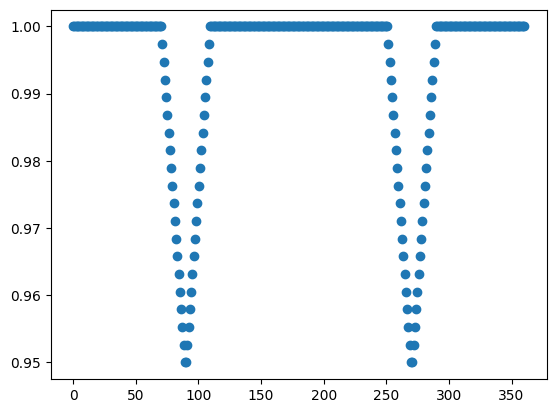

In [13]:
import numpy as np

x = np.linspace(0, 360, 360)
a0 , a1 , a2 , a3 = 70 , 110 , 250 , 290
y =  -((np.sin((x - 45) / 180 * 2 * np.pi) ) )*0.9 + 1.77
y[:] = 1

y[a0:int((a1+a0)/2)] = np.linspace(1, 0.95, int((a1-a0)/2) )
y[int((a1+a0)/2):a1] = np.linspace(0.95 , 1 , int((a1-a0)/2) )
y[a2:int((a3+a2)/2)] = np.linspace(1, 0.95, int((a3-a2)/2) )
y[int((a3+a2)/2):a3] = np.linspace(0.95 , 1 , int((a3-a2)/2) )
# y+=0.2
import matplotlib.pyplot as plt
plt.scatter(x, y)

plt.show()


In [11]:
y

array([          1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,
                 1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,
                 1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,
                 1,           1,           